In [1]:
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
#
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Import and view the data

In [31]:
df=pd.read_csv('data/KNN - Social_Network_Ads.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.shape

(400, 5)

In [4]:
#converting categorical male female to numeric
df=pd.get_dummies(data=df,columns=['Gender'],drop_first=True)
df

,User ID,Age,EstimatedSalary,Purchased,Gender_Male
0,15624510,19,19000,0,1
1,15810944,35,20000,0,1
2,15668575,26,43000,0,0
3,15603246,27,57000,0,0
4,15804002,19,76000,0,1
...,...,...,...,...,...
395,15691863,46,41000,1,0
396,15706071,51,23000,1,1
397,15654296,50,20000,1,0
398,15755018,36,33000,0,1


In [5]:
#Defining the x and y 
# we will be dropping the USER ID and purchase so x only has features
# y has the target...purchased
x=df.drop(columns=['User ID','Purchased'])
y=df.Purchased

### Create Train and Test dataset

In [6]:
#Splitting the dat into train and test
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=10,test_size=.3)

In [20]:
#creating a KNN model 
# we will start with k value of 4
# minkowski metric and p value of2 means we are using Euclidean distance
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)

In [21]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [26]:
x_train

,Age,EstimatedSalary,Gender_Male
399,49,36000,0
25,47,20000,1
279,50,36000,0
260,35,77000,0
130,31,58000,1
...,...,...,...
369,54,26000,0
320,52,138000,0
15,29,80000,1
125,39,61000,0


In [30]:
knn.kneighbors(x_test.iloc[[2]], n_neighbors = 6)

(array([[  10.        ,   17.02938637, 1000.02499969, 1000.02499969,
         1000.06049817, 1000.07249737]]),
 array([[138, 127,  21, 272,  46, 209]], dtype=int64))

In [22]:
knn.score(x_test, y_test)

0.85

In [10]:
#select a row by index where user made a purchase
x_test.iloc[[2]]

,Age,EstimatedSalary,Gender_Male
352,42,90000,0


In [11]:
#test
knn.predict(x_test.iloc[[2]])

array([1], dtype=int64)

In [12]:
#Above index in the original dataframe
df.iloc[352]

User ID            15587419
Age                      42
EstimatedSalary       90000
Purchased                 1
Gender_Male               0
Name: 352, dtype: int64

### Get optimal value of K

In [13]:
#create 2 list for storing all the model score for diffrent K values
trainAccuracy=[]
testAccuracy=[]

In [14]:
#create model for K values from 1 to 40
for k in range(1,40):
    model=KNeighborsClassifier(n_neighbors=k)
    model.fit(x_train,y_train)
    trainAccuracy.append(model.score(x_train,y_train))
    testAccuracy.append(model.score(x_test,y_test))

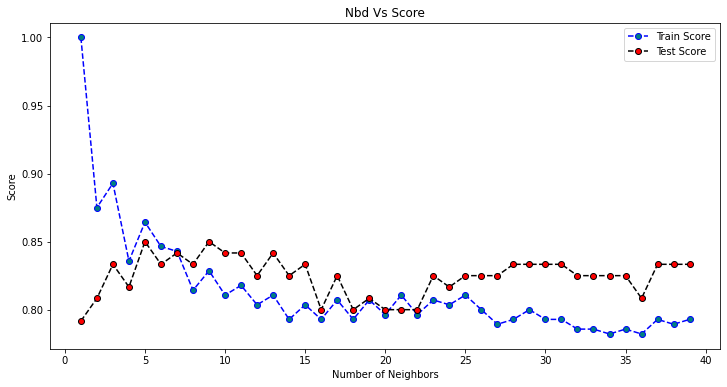

In [15]:
#create a plot using the information from the above loop
plt.figure(figsize=(12,6))
plt.plot(range(1,40),trainAccuracy,label="Train Score",marker="o",markerfacecolor="teal",color="blue",linestyle="dashed")
plt.plot(range(1,40),testAccuracy,label="Test Score",marker="o",markerfacecolor="red",color="black",linestyle="dashed")
plt.legend()
plt.xlabel("Number of Neighbors")
plt.ylabel("Score")
plt.title("Nbd Vs Score")
plt.show()

In [16]:
#Confusion Matrix
y_pred = knn.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[76,  7],
       [15, 22]], dtype=int64)

Text(42.0, 0.5, 'Actual')

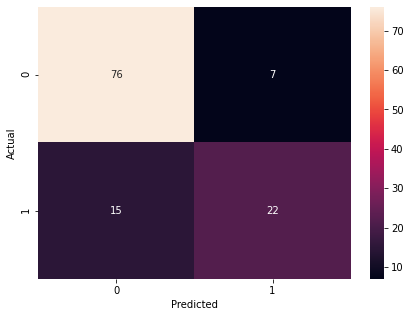

In [17]:
#plot confusion matrix
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [18]:
x_test.shape

(120, 3)

In [19]:
#Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.87        83
           1       0.76      0.59      0.67        37

    accuracy                           0.82       120
   macro avg       0.80      0.76      0.77       120
weighted avg       0.81      0.82      0.81       120

